<a href="https://colab.research.google.com/github/vincentlam13/code/blob/master/stock_price_simulation_with_monte_carlo_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulating Stock Prices with Monte Carlo Methods



## Intro

Monte Carlo methods are a methodology by which we create a given model of an event, generate a series of random values from that model, and apply those values as inputs to a scenario many times in order to simulate what would happen over a long period of time. This allows us to make reasonable models of events whose probability distribution is inherently non-deterministic or at least very difficult to model with analytical methods.

This notebook uses Monte Carlo methods to model the price of a stock over a year. We will then use this model to answer the question: Should we invest in this stock?

## Steps
The four main steps for conducting a Monte Carlo analysis are:
1. Construct a model
2. Generate random values
3. Apply them over many trials
4. Collect results and analyse

## 1. Construct a model
To model a stock price, we will simply assume that the change in price of the stock will follow a normal distribution with a mean and standard deviation (which, in finance, are called drift and shock respectively).

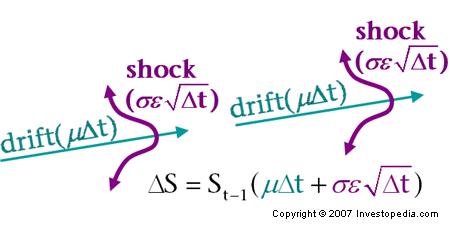

Where:
- µ is the expected price change (or expected level of return)
- σ is the volatility of the stock
- ∆t is the change in time
- ε is a random scalar to modify the volatility
- S is the stock price

In [34]:
# import libraries

import math
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data # library of datasets of various financial databases

In [35]:
# get Yahoo financial data for Apple from 01/01/2000
apple = data.DataReader('AAPL', 'yahoo', start='1/1/2000')

In [36]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.855168
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.783068
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.794528
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.725771
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.760149


In [37]:
apple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,122.250000
2020-12-07,124.570000,122.250000,122.309998,123.750000,86712000.0,123.750000
2020-12-08,124.980003,123.089996,124.370003,124.379997,82225500.0,124.379997
2020-12-09,125.949997,121.000000,124.529999,121.779999,114816900.0,121.779999
2020-12-10,123.864998,120.150002,120.500000,123.128197,62943658.0,123.128197


In [38]:
apple.shape

(5270, 6)

In [39]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5270.000000,5270.000000,5270.000000,5270.000000,5.270000e+03,5270.000000
mean,18.624177,18.229052,18.427649,18.434019,4.456533e+08,17.304529
std,23.429196,22.869420,23.150186,23.161639,3.918035e+08,22.860187
min,0.235536,0.227143,0.231964,0.234286,2.019780e+07,0.200465
25%,1.363125,1.329063,1.346875,1.349464,1.778181e+08,1.154663
50%,9.241964,8.947321,9.134464,9.080714,3.335990e+08,7.769872
75%,27.839375,27.218124,27.527501,27.484375,5.934565e+08,25.350362
max,137.979996,130.529999,137.589996,134.179993,7.421641e+09,133.948898


In [40]:
# calculate the number of days that have elapsed for every price point
time_elapsed = (apple.index[-1] - apple.index[0]).days

# calculate the Compounded Annual Growth Rate (CAGR)
# by taking ratio between closing price and opening price
# and raise that value to the inverse of the number of years elapsed
# then subtract 1 (to make it percentage growth)
price_ratio = (apple['Adj Close'][-1] / apple['Adj Close'][1])
inverse_number_of_years = 365.0 / time_elapsed
cagr = price_ratio ** inverse_number_of_years - 1

# determine annual volatility of returns
# volatility is the standard deviation of percent change in price of each day
volatility = apple['Adj Close'].pct_change().std()

In [41]:
# to make this figure useful as an annual measure
# we need to scale it by an annualisation factor
# most common factor is square root of number of trading days in a year
# this is 252 days
NUMBER_OF_TRADING_DAYS = 252
volatility = volatility * math.sqrt(NUMBER_OF_TRADING_DAYS)

# print results
print("CAGR (mean returns): ", str(round(cagr, 4)))
print("Volatility (standard deviation of return: ", str(round(volatility, 4)))

CAGR (mean returns):  0.273
Volatility (standard deviation of return:  0.4066


## 2. Generate Random Values
This is everything we need to model a standard deviation of stock prices. Let's create a random sample using these parameters. We will use the *normal* function from the numpy library.

In [42]:
daily_return_percentages = np.random.normal(
    cagr / NUMBER_OF_TRADING_DAYS,
    volatility / math.sqrt(NUMBER_OF_TRADING_DAYS),
    NUMBER_OF_TRADING_DAYS
) + 1

In [43]:
daily_return_percentages

array([0.97885069, 0.95945437, 1.00470712, 1.00000635, 0.99195617,
       1.02420165, 0.98983209, 0.9889361 , 1.0283837 , 1.00786834,
       0.98786408, 0.99038181, 1.02239781, 0.97189504, 0.96473777,
       1.02158136, 0.98477214, 0.9887034 , 1.00019736, 1.01081078,
       1.00919278, 1.03914829, 1.04306413, 1.00845332, 1.02378584,
       1.05020059, 1.02307437, 1.01590346, 0.95489566, 1.00962748,
       0.98793656, 0.94547467, 0.9783009 , 0.97429248, 1.00307876,
       0.96766228, 1.01608297, 1.01260916, 1.04992478, 1.00698566,
       1.04033256, 0.99181148, 0.99494122, 1.01806554, 1.01749588,
       0.9485075 , 1.0013218 , 0.98715862, 1.0266063 , 1.00588209,
       0.98231159, 0.98611462, 0.97489037, 1.00517977, 1.04724919,
       0.98823359, 0.95724219, 1.0042272 , 1.02088032, 0.97406641,
       1.01937258, 1.00101096, 1.01517364, 0.99230869, 1.0223549 ,
       1.0180851 , 1.01734711, 1.00357394, 0.97956122, 1.00657689,
       1.01855281, 0.98556017, 0.95635945, 0.95828544, 0.98306

Now we have a list of return percentages. Let's create a price series from this list. Let's start with the most recent price. To generate each consecutive price, we will apply the price change to the most recent price. This results in a distribution called a "random walk".

In [44]:
price_series = [apple['Adj Close'][-1]]

for drp in daily_return_percentages:
  price_series.append(price_series[-1] * drp)

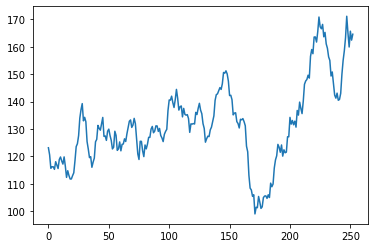

In [45]:
# plot the "random walk" of stock prices
plt.plot(price_series)
plt.show()

The plot shows a single simulation of a potential future price series that was based on the normal distribution of daily returns we calculated earlier.

However, this is not very useful since this is one instance out of an many possibile price series for the stock. The actual probability that the stock would follow this price series in the future is close to zero.

Let's now run this simulation many times, to gain some insight.

## 3. Apply many simulations

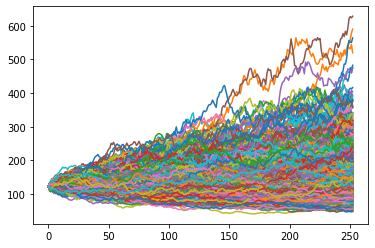

In [46]:
NUMBER_OF_TRIALS = 1000
for i in range(NUMBER_OF_TRIALS):
  daily_return_percentages = np.random.normal(
      cagr / NUMBER_OF_TRADING_DAYS,
      volatility / math.sqrt(NUMBER_OF_TRADING_DAYS),
      NUMBER_OF_TRADING_DAYS
  ) + 1
  price_series = [apple['Adj Close'][-1]]

  for drp in daily_return_percentages:
    price_series.append(price_series[-1] * drp)

  plt.plot(price_series)
plt.show()

We can see the outcomes of 1000 possible price series. These are all randomly generated based on the initial conditions we set to describe the normal distribution of daily returns.

This chart is hard to intepret, so let's use a histogram instead of ending price points. This will show the distribution of where the "random" predictions end up.

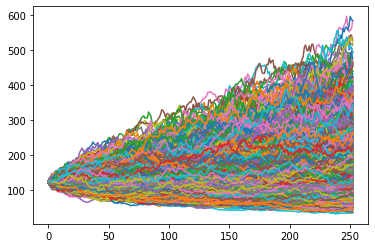

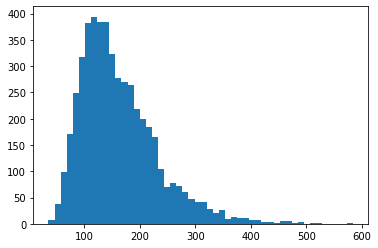

In [47]:
LARGER_NUMBER_OF_TRIALS = 5000

ending_price_points = []
for i in range(LARGER_NUMBER_OF_TRIALS):
    daily_return_percentages = np.random.normal(
        cagr / NUMBER_OF_TRADING_DAYS, 
        volatility / math.sqrt(NUMBER_OF_TRADING_DAYS),
        NUMBER_OF_TRADING_DAYS
    ) + 1
    price_series = [apple['Adj Close'][-1]]

    for drp in daily_return_percentages:
        price_series.append(price_series[-1] * drp)
    
    plt.plot(price_series)
    
    ending_price_points.append(price_series[-1])

plt.show()

plt.hist(ending_price_points,bins=50)
plt.show()

## 4. Collect and Analyse Results
Let's get the mean of the distribution to find the expected value of the ending price points.

In [50]:
expected_ending_price_point = round(np.mean(ending_price_points), 2)
print("Expected ending price point: ", str(expected_ending_price_point))

Expected ending price point:  162.0


Due to the Law of Large Numbers, this expected_ending_price number (can think of as the sample mean) will eventually converge to the last, known price point multiplied by the expected daily price change (the population mean). 

In [51]:
population_mean = (cagr + 1) * apple['Adj Close'][-1]
print ("Sample Mean : ", str(expected_ending_price_point))
print ("Population Mean: ", str(round(population_mean,2)));
print ("Percent Difference : ", str(round((population_mean - expected_ending_price_point)/population_mean * 100,2)), "%")

Sample Mean :  162.0
Population Mean:  156.75
Percent Difference :  -3.35 %


The true usefulness of Monte Carlo simulations is to see the distribution of the ending price points and gauage risk versus reward. Let's take the top 10 and bottom 10 percentiles.

In [52]:
top_ten = np.percentile(ending_price_points, 100-10)
bottom_ten = np.percentile(ending_price_points, 10);
print ("Top 10% : ", str(round(top_ten,2)))
print ("Bottom 10% : ", str(round(bottom_ten,2)))

Top 10% :  254.61
Bottom 10% :  87.27


This shows that there is a 10% chance that the stock will grow to \$254.91 and an equal chance to drop to \$87.27.

Let's ask the question "is it worth the 10% chance risk to drop to \87.27 if the expected reward is \$162.00?"

To show this, let's draw top and bottom 10 percentiles on the histogram as well as the last known price point.

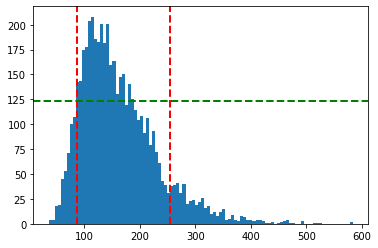

In [53]:

plt.hist(ending_price_points, bins=100)
plt.axvline(top_ten,color='r', linestyle='dashed', linewidth=2)
plt.axvline(bottom_ten,color='r', linestyle='dashed', linewidth=2)
plt.axhline(apple['Adj Close'][-1], color='g', linestyle='dashed', linewidth=2)
plt.show()

It looks like it is fairly even for the chance to gain or lose.

## Conclusion
This notebook shows the construction of a model for a stock's daily returns. Then, we generated random values from the model. Applied those values to an equation representing change over time. Finally, we collected the data and made observations and assessed risk vs reward, whilst being mindful of the limitations of the Monte Carlo simulation.

The Monte Carlo methodology is advantageous as it is a simple and straightforward algorithm for predicting the extrema of a given situation with reasonable confidence thanks to the Law of Large Numbers.

This notebook follows the example by MishaShapo.